In [338]:
from fpl_auto import data
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

vastaav = data.fpl_data('data/', '2023-24')

training_data, test_data = vastaav.get_training_data_all(
            '2023-24', 1 - 38, 1)


In [339]:
regr = GradientBoostingRegressor(criterion='squared_error', n_estimators=500, learning_rate=0.9)

pos_residual_train = []
pos_residual_test = []


for i in range(4):
    X_train, y_train = training_data[i]
    X_test, y_test = test_data[i]

    regr.fit(X_train, y_train)
    predict_train = regr.predict(X_train)
    predict_test = regr.predict(X_test)

    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    mse_train = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
    abs_train = sum(abs(residuals))/len(residuals)
    abs_test = sum(abs(residuals2))/len(residuals2)

    pos_residual_train.append([y_train, residuals])
    pos_residual_test.append([y_test, residuals2])

In [340]:
avg_rmse_train = 0
avg_rmse_test = 0
avg_abs_train = 0
avg_abs_test = 0

for i in range(4):
    avg_rmse_train += np.sqrt(sum(pos_residual_train[i][1]**2)/len(pos_residual_train[i][1]))
    avg_rmse_test += np.sqrt(sum(pos_residual_test[i][1]**2)/len(pos_residual_test[i][1]))
    avg_abs_train += sum(abs(pos_residual_train[i][1]))/len(pos_residual_train[i][1])
    avg_abs_test += sum(abs(pos_residual_test[i][1]))/len(pos_residual_test[i][1])

print(f'RMSE on train set: {avg_rmse_train:.3f}')
print(f'RMSE on test set: {avg_rmse_test:.3f}')
print(f'Mean Absolute value of residuals on train set: {avg_abs_train:.3f}')
print(f'Mean Absolute value of residuals on test set: {avg_abs_test:.3f}')

RMSE on train set: 0.055
RMSE on test set: 1.787
Mean Absolute value of residuals on train set: 0.028
Mean Absolute value of residuals on test set: 0.535


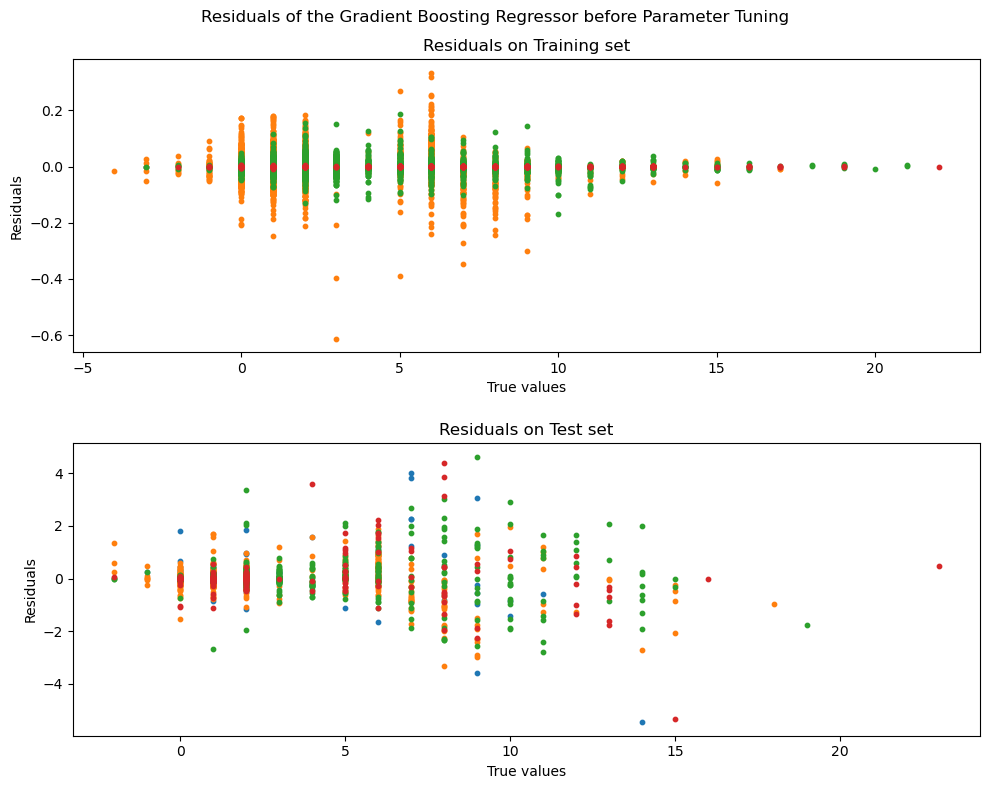

In [341]:
size = 10

# Create a wider figure
plt.figure(figsize=(10, 8))
plt.suptitle('Residuals of the Gradient Boosting Regressor before Parameter Tuning')
# Plot the Training residuals
plt.subplot(2, 1, 1)
for i in range(4):
    y_train, residuals = pos_residual_train[i]
    plt.scatter(y_train, residuals, s=size)
plt.title('Residuals on Training set')
plt.xlabel('True values')
plt.ylabel('Residuals')

# Plot the Test residuals
plt.subplot(2, 1, 2)
for i in range(4):
    y_test, residuals2 = pos_residual_test[i]
    plt.scatter(y_test, residuals2, s=size)
plt.title('Residuals on Test set')
plt.xlabel('True values')
plt.ylabel('Residuals')

# Adjust layout to leave space between subplots
plt.tight_layout(h_pad=2)

plt.show()

Text(0.5, 0, 'Average decrease in MSE')

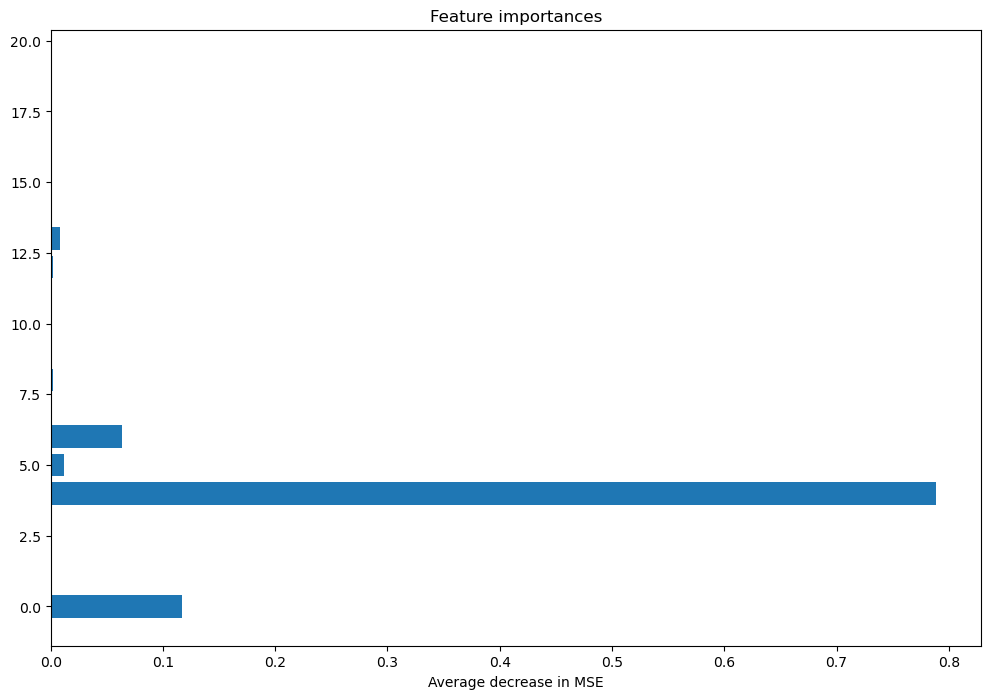

In [342]:
importances = regr.feature_importances_
plt.figure()
plt.title("Feature importances")
ax = plt.barh(range(len(X_train.columns)),importances,align="center");
plt.xlabel('Average decrease in MSE')

Text(0.5, 0, 'Average decrease in MSE')

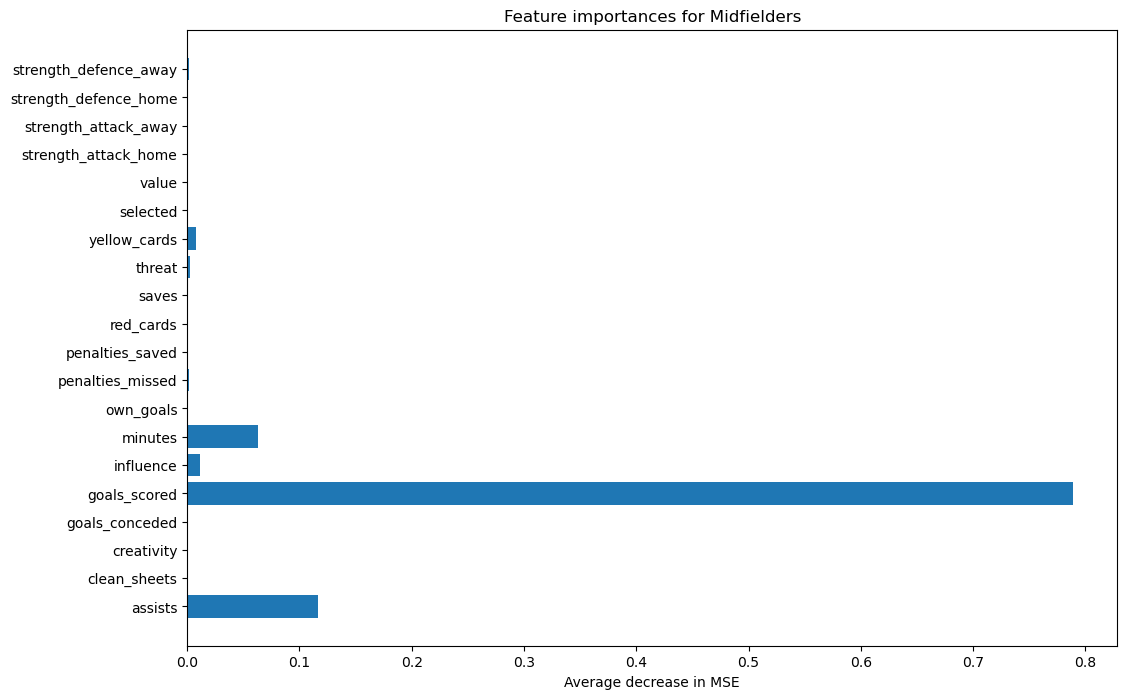

In [343]:
plt.figure()
plt.title("Feature importances for Midfielders")
ax = plt.barh(list(X_train.columns)[0:20],importances[0:20],align="center");
plt.xlabel('Average decrease in MSE')

In [344]:
pos_mse_train = []
pos_mse_test = []
pos_abs_train = []
pos_abs_test = []

training_data, test_data = vastaav.get_training_data_all(
            '2023-24', 1 - 38, 1)

for j in range(0, 4):
    
    pos_training_data = training_data[j]
    pos_test_data = test_data[j]
    X_train, y_train = pos_training_data
    X_test, y_test = pos_test_data

    features = np.arange(1, len(X_train.columns) + 1, 1)
    feature_n = len(X_train.columns)
    n = len(features)
    mse_train = [math.nan for i in range(n)]
    mse_test = [math.nan for i in range(n)]
    mse_out_of_bag = [math.nan for i in range(n)]
    abs_train = [math.nan for i in range(n)]
    abs_test = [math.nan for i in range(n)]
    abs_out_of_bag = [math.nan for i in range(n)]

    for i in range(n):
        print('Fitting model', j, 'with max_features = ', i, ' out of ', n, end='\r')
        GBRegr = GradientBoostingRegressor(n_estimators = 100, max_features = features[i])
        GBRegr.fit(X_train, y_train)
        
        predict_train = GBRegr.predict(X_train)
        predict_test = GBRegr.predict(X_test)    
        
        residuals = predict_train - y_train
        residuals2 = predict_test - y_test

        mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
        mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
        
        abs_train[i] = sum(abs(residuals))/len(residuals)
        abs_test[i] = sum(abs(residuals2))/len(residuals2)
    
    pos_mse_train.append(mse_train)
    pos_mse_test.append(mse_test)
    pos_abs_train.append(abs_train)
    pos_abs_test.append(abs_test)

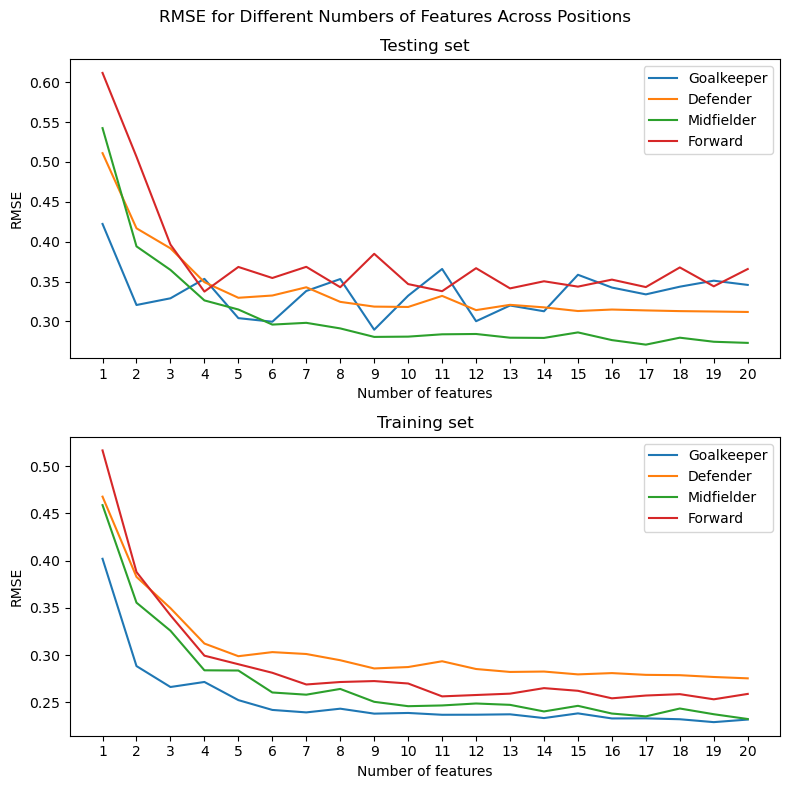

In [345]:
pos = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.suptitle('RMSE for Different Numbers of Features Across Positions')

# Plot for test set
for i in range(4):
    axs[0].plot(features, pos_mse_test[i], label=pos[i])
axs[0].set_xlabel('Number of features')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Testing set')
axs[0].set_xticks(features)
axs[0].legend()

# Plot for train set
for i in range(4):
    axs[1].plot(features, pos_mse_train[i], label=pos[i])
axs[1].set_xlabel('Number of features')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Training set')
axs[1].set_xticks(features)
axs[1].legend()

plt.tight_layout()
plt.show()


In [346]:
training_data, test_data = vastaav.get_training_data_all(
            '2023-24', 1 - 38, 1)

# MID data
training_data = training_data[2]
test_data = test_data[2]
X_train, y_train = training_data
X_test, y_test = test_data

depth = np.arange(1, 16, 1)
n = len(depth)

pos_mse_train = []
pos_mse_test = []
pos_abs_train = []
pos_abs_test = []

for j in range(0, 4):
    n = len(depth)
    mse_train = [math.nan for i in range(n)]
    mse_test = [math.nan for i in range(n)]
    mse_out_of_bag = [math.nan for i in range(n)]
    abs_train = [math.nan for i in range(n)]
    abs_test = [math.nan for i in range(n)]
    abs_out_of_bag = [math.nan for i in range(n)]

    for i in range(n):
        print('Fitting model', j + 1, 'with depth = ', i, ' out of ', n, end='\r')
        GBRegr = GradientBoostingRegressor(n_estimators = 100, max_depth = depth[i])
        GBRegr.fit(X_train, y_train)
        
        predict_train = GBRegr.predict(X_train)

        predict_test = GBRegr.predict(X_test)
        
        residuals = predict_train - y_train
        residuals2 = predict_test - y_test
        mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
        mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
        
        abs_train[i] = sum(abs(residuals))/len(residuals)
        abs_test[i] = sum(abs(residuals2))/len(residuals2)

    pos_mse_train.append(mse_train)
    pos_mse_test.append(mse_test)
    pos_abs_train.append(abs_train)
    pos_abs_test.append(abs_test)
    

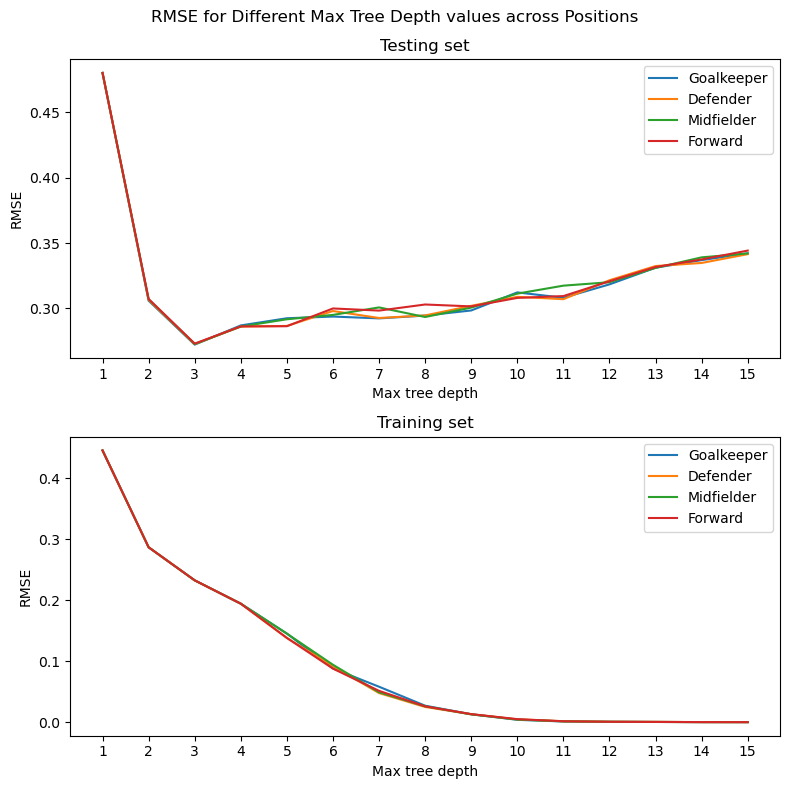

In [347]:
pos = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.suptitle('RMSE for Different Max Tree Depth values across Positions')

# Plot for test set
for i in range(4):
    axs[0].plot(depth, pos_mse_test[i], label=pos[i])
axs[0].set_xlabel('Max tree depth')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Testing set')
axs[0].set_xticks(depth)
axs[0].legend()

# Plot for train set
for i in range(4):
    axs[1].plot(depth, pos_mse_train[i], label=pos[i])
axs[1].set_xlabel('Max tree depth')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Training set')
axs[1].set_xticks(depth)
axs[1].legend()

plt.tight_layout()
plt.show()


In [348]:
l_rate = np.arange(0.1, 1, 0.05)
n = len(l_rate)

pos_mse_train = []
pos_mse_test = []
pos_abs_train = []
pos_abs_test = []

for j in range(0, 4):
    n = len(l_rate)
    mse_train = [math.nan for i in range(n)]
    mse_test = [math.nan for i in range(n)]
    mse_out_of_bag = [math.nan for i in range(n)]
    abs_train = [math.nan for i in range(n)]
    abs_test = [math.nan for i in range(n)]
    abs_out_of_bag = [math.nan for i in range(n)]

    for i in range(n):
        print('Fitting model', j + 1, 'with l_rate = ', i, ' out of ', n, end='\r')
        GBRegr = GradientBoostingRegressor(n_estimators = 100, learning_rate = l_rate[i])
        GBRegr.fit(X_train, y_train)
        
        predict_train = GBRegr.predict(X_train)

        predict_test = GBRegr.predict(X_test)
        
        residuals = predict_train - y_train
        residuals2 = predict_test - y_test
        mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
        mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
        
        abs_train[i] = sum(abs(residuals))/len(residuals)
        abs_test[i] = sum(abs(residuals2))/len(residuals2)
    
    pos_mse_train.append(mse_train)
    pos_mse_test.append(mse_test)
    pos_abs_train.append(abs_train)
    pos_abs_test.append(abs_test)
    

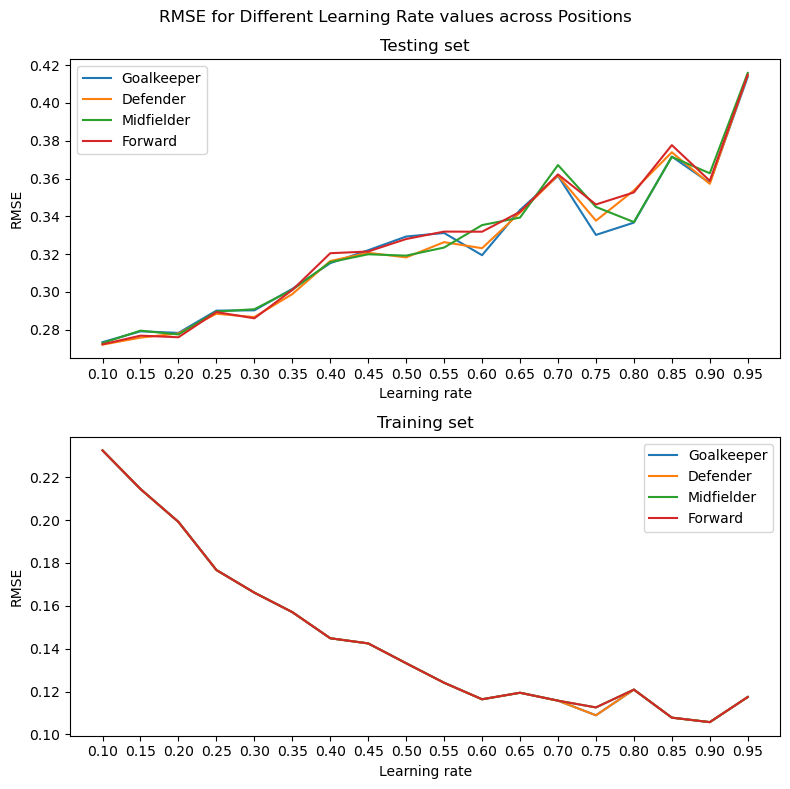

In [349]:
pos = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.suptitle('RMSE for Different Learning Rate values across Positions')

# Plot for test set
for i in range(4):
    axs[0].plot(l_rate, pos_mse_test[i], label=pos[i])
axs[0].set_xlabel('Learning rate')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Testing set')
axs[0].set_xticks(l_rate)
axs[0].legend()

# Plot for train set
for i in range(4):
    axs[1].plot(l_rate, pos_mse_train[i], label=pos[i])
axs[1].set_xlabel('Learning rate')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Training set')
axs[1].set_xticks(l_rate)
axs[1].legend()

plt.tight_layout()
plt.show()


In [350]:
n_est = np.arange(100, 5100, 500)

pos_mse_train = []
pos_mse_test = []
pos_abs_train = []
pos_abs_test = []

for j in range(0, 4):
    n = len(n_est)
    mse_train = [math.nan for i in range(n)]
    mse_test = [math.nan for i in range(n)]
    mse_out_of_bag = [math.nan for i in range(n)]
    abs_train = [math.nan for i in range(n)]
    abs_test = [math.nan for i in range(n)]
    abs_out_of_bag = [math.nan for i in range(n)]

    for i in range(n):
        print('Fitting model', j + 1, 'with n_estimators = ', i, ' out of ', n, end='\r')
        GBRegr = GradientBoostingRegressor(n_estimators = n_est[i])
        GBRegr.fit(X_train, y_train)
        
        predict_train = GBRegr.predict(X_train)

        predict_test = GBRegr.predict(X_test)
        
        residuals = predict_train - y_train
        residuals2 = predict_test - y_test
        mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
        mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
        
        abs_train[i] = sum(abs(residuals))/len(residuals)
        abs_test[i] = sum(abs(residuals2))/len(residuals2)
    
    pos_mse_train.append(mse_train)
    pos_mse_test.append(mse_test)
    pos_abs_train.append(abs_train)
    pos_abs_test.append(abs_test)
    

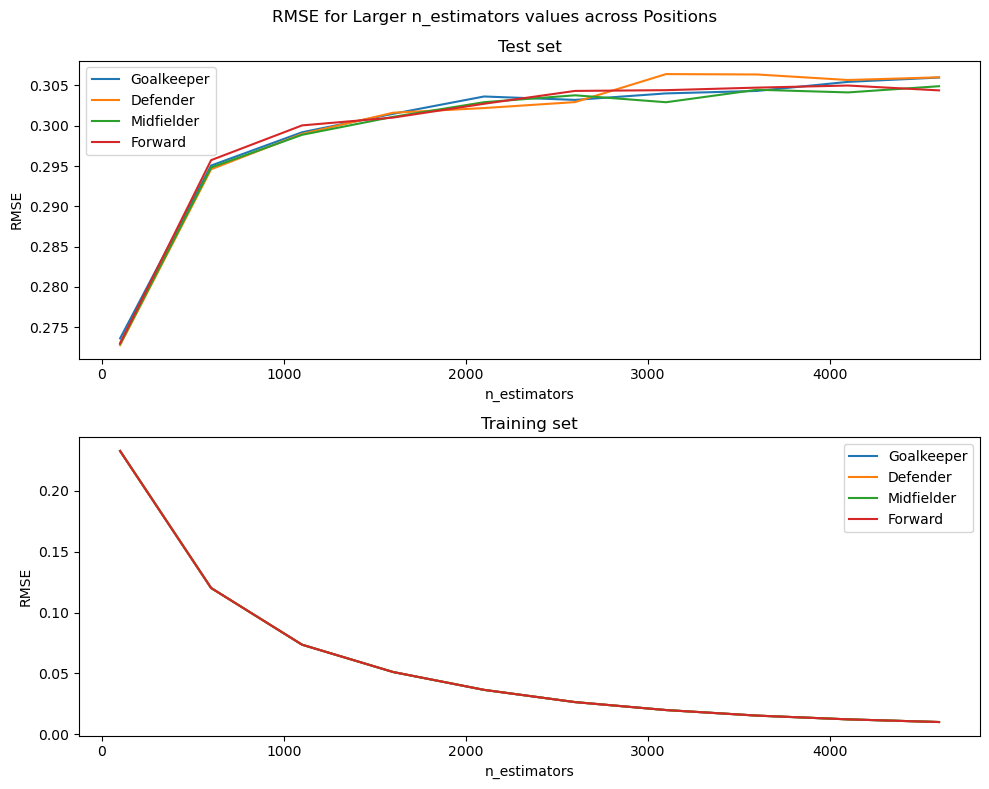

In [351]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('RMSE for Larger n_estimators values across Positions')

# Plot for Test set
for i in range(4):
    axs[0].plot(n_est, pos_mse_test[i], label=pos[i])
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_title('Test set')

# Plot for Training set
for i in range(4):
    axs[1].plot(n_est, pos_mse_train[i], label=pos[i])
axs[1].set_xlabel('n_estimators')
axs[1].set_ylabel('RMSE')
axs[1].legend()
axs[1].set_title('Training set')

plt.tight_layout()
plt.show()

In [352]:
n_est = [50, 90, 100, 110, 120, 130, 140, 200, 500]

pos_mse_train = []
pos_mse_test = []
pos_abs_train = []
pos_abs_test = []

for j in range(4):
    n = len(n_est)
    mse_train = [math.nan for i in range(n)]
    mse_test = [math.nan for i in range(n)]
    mse_out_of_bag = [math.nan for i in range(n)]
    abs_train = [math.nan for i in range(n)]
    abs_test = [math.nan for i in range(n)]
    abs_out_of_bag = [math.nan for i in range(n)]

    for i in range(n):
        print('Fitting model', j + 1, 'with n_estimators = ', i, ' out of ', n, end='\r')
        GBRegr = GradientBoostingRegressor(n_estimators = n_est[i])
        GBRegr.fit(X_train, y_train)
        
        predict_train = GBRegr.predict(X_train)

        predict_test = GBRegr.predict(X_test)
        
        residuals = predict_train - y_train
        residuals2 = predict_test - y_test
        mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
        mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
        
        abs_train[i] = sum(abs(residuals))/len(residuals)
        abs_test[i] = sum(abs(residuals2))/len(residuals2)
    
    pos_mse_train.append(mse_train)
    pos_mse_test.append(mse_test)
    pos_abs_train.append(abs_train)
    pos_abs_test.append(abs_test)
    

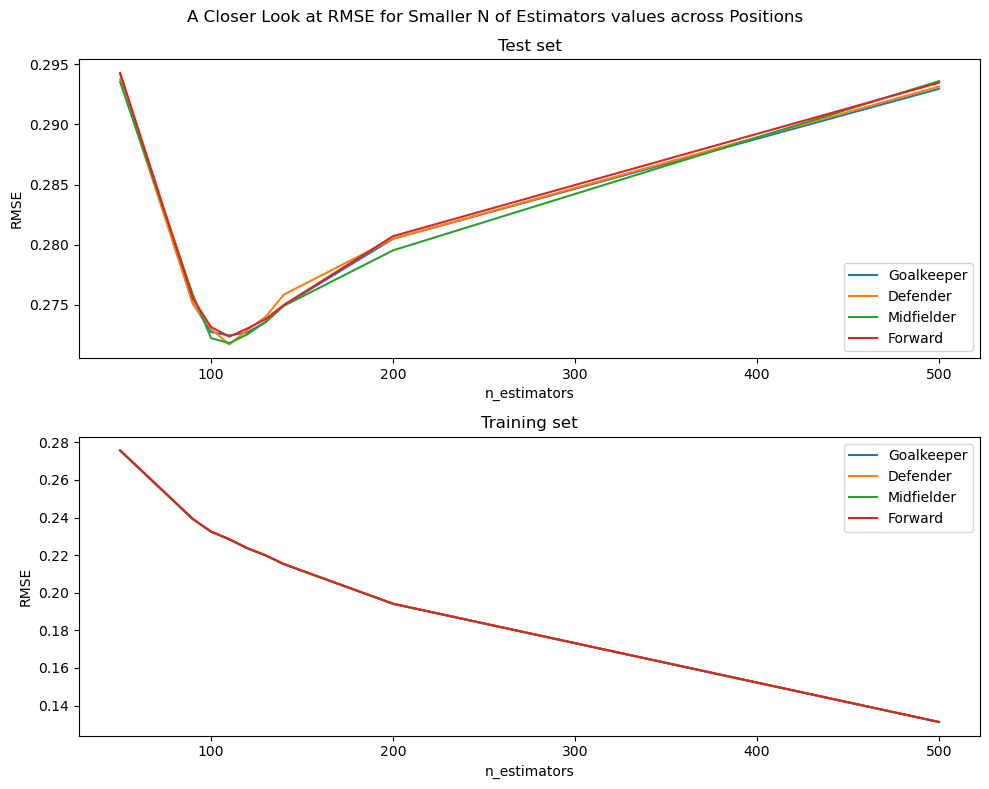

In [353]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('A Closer Look at RMSE for Smaller N of Estimators values across Positions')

# Plot for Test set
for i in range(4):
    axs[0].plot(n_est, pos_mse_test[i], label=pos[i])
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_title('Test set')

# Plot for Training set
for i in range(4):
    axs[1].plot(n_est, pos_mse_train[i], label=pos[i])
axs[1].set_xlabel('n_estimators')
axs[1].set_ylabel('RMSE')
axs[1].legend()
axs[1].set_title('Training set')

plt.tight_layout()
plt.show()

In [354]:
training_data, test_data = vastaav.get_training_data_all(
            '2023-24', 1 - 38, 1)

n_est = 110

regr = [
      GradientBoostingRegressor(criterion='squared_error', n_estimators=n_est, learning_rate=0.1, max_depth=3, max_features=5), # Goalkeeper
      GradientBoostingRegressor(criterion='squared_error', n_estimators=n_est, learning_rate=0.1, max_depth=3, max_features=10), # Defender
      GradientBoostingRegressor(criterion='squared_error', n_estimators=n_est, learning_rate=0.1, max_depth=3, max_features=20), # Midfielder
      GradientBoostingRegressor(criterion='squared_error', n_estimators=n_est, learning_rate=0.1, max_depth=3, max_features=10      ) # Forward
]

pos_residual_train = []
pos_residual_test = []

for i in range(4):
    X_train, y_train = training_data[i]
    X_test, y_test = test_data[i]

    regr[i].fit(X_train, y_train)
    predict_train = regr[i].predict(X_train)
    predict_test = regr[i].predict(X_test)

    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    mse_train = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
    abs_train = sum(abs(residuals))/len(residuals)
    abs_test = sum(abs(residuals2))/len(residuals2)

    pos_residual_train.append([y_train, residuals])
    pos_residual_test.append([y_test, residuals2])




In [355]:
avg_rmse_train = 0
avg_rmse_test = 0
avg_abs_train = 0
avg_abs_test = 0

for i in range(4):
    avg_rmse_train += np.sqrt(sum(pos_residual_train[i][1]**2)/len(pos_residual_train[i][1]))
    avg_rmse_test += np.sqrt(sum(pos_residual_test[i][1]**2)/len(pos_residual_test[i][1]))
    avg_abs_train += sum(abs(pos_residual_train[i][1]))/len(pos_residual_train[i][1])
    avg_abs_test += sum(abs(pos_residual_test[i][1]))/len(pos_residual_test[i][1])

print(f'RMSE on train set: {avg_rmse_train:.3f}')
print(f'RMSE on test set: {avg_rmse_test:.3f}')
print(f'Mean Absolute value of residuals on train set: {avg_abs_train:.3f}')
print(f'Mean Absolute value of residuals on test set: {avg_abs_test:.3f}')

RMSE on train set: 1.025
RMSE on test set: 1.308
Mean Absolute value of residuals on train set: 0.358
Mean Absolute value of residuals on test set: 0.412


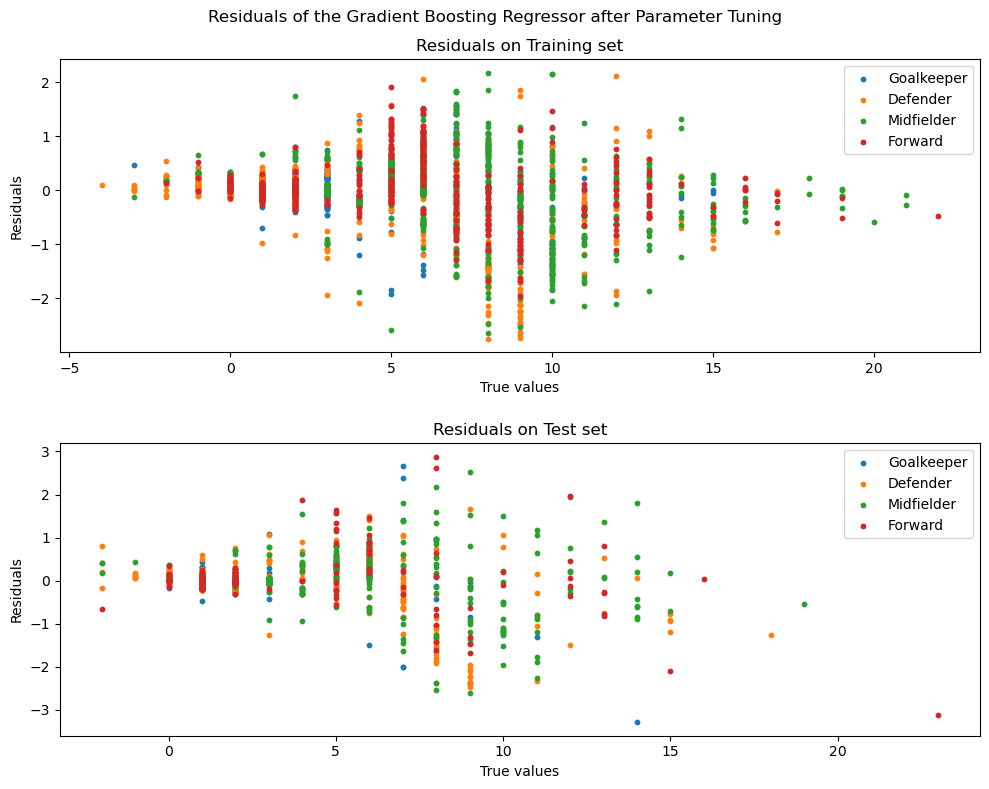

In [356]:
size = 10

# Create a wider figure
plt.figure(figsize=(10, 8))
plt.suptitle('Residuals of the Gradient Boosting Regressor after Parameter Tuning')
# Plot the Training residuals
plt.subplot(2, 1, 1)
for i in range(4):
    y_train, residuals = pos_residual_train[i]
    plt.scatter(y_train, residuals, s=size, label=pos[i])
plt.title('Residuals on Training set')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.legend()

# Plot the Test residuals
plt.subplot(2, 1, 2)
for i in range(4):
    y_test, residuals2 = pos_residual_test[i]
    plt.scatter(y_test, residuals2, s=size, label=pos[i])
plt.title('Residuals on Test set')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.legend()

# Adjust layout to leave space between subplots
plt.tight_layout(h_pad=2)

plt.show()